In [ ]:
from google.colab import files

# Upload the dataset (archive.zip)
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

# Extract the zip file
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("aviation_data")

# List files
os.listdir("aviation_data")


['USState_Codes.csv', 'AviationData.csv']

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("aviation_data/AviationData.csv", encoding="ISO-8859-1", low_memory=False)

# Convert Event.Date to datetime
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
df["Year"] = df["Event.Date"].dt.year

# Replace null injury counts with 0
injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
df[injury_cols] = df[injury_cols].fillna(0)

# Total people involved in each incident
df["Total.Involved"] = df[injury_cols].sum(axis=1)

# Drop rows with missing aircraft manufacturer or model
df = df.dropna(subset=["Make", "Model"])

# Drop irrelevant columns
cols_to_drop = [
    "ev_id", "Investigation.Type", "Registration.Number", "Latitude", "Longitude",
    "Airport.Code", "Airport.Name", "Injury.Severity", "Weather.Condition",
    "Report.Status", "Publication.Date"
]
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Group rare aircraft manufacturers into "Other"
make_counts = df["Make"].value_counts()
common_makes = make_counts[make_counts > 100].index
df["Make.Grouped"] = df["Make"].apply(lambda x: x if x in common_makes else "Other")

# Preview result
df.head()



,Event.Id,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Year,Total.Involved,Make.Grouped
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,Stinson,108-3,No,...,Personal,NaN,2.0,0.0,0.0,0.0,Cruise,1948,2.0,Stinson
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,Piper,PA24-180,No,...,Personal,NaN,4.0,0.0,0.0,0.0,Unknown,1962,4.0,Piper
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",United States,Destroyed,NaN,Cessna,172M,No,...,Personal,NaN,3.0,0.0,0.0,0.0,Cruise,1974,3.0,Cessna
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,Rockwell,112,No,...,Personal,NaN,2.0,0.0,0.0,0.0,Cruise,1977,2.0,Rockwell
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",United States,Destroyed,NaN,Cessna,501,No,...,Personal,NaN,1.0,2.0,0.0,0.0,Approach,1979,3.0,Cessna


In [ ]:
# Export cleaned data for Tableau dashboard
df.to_csv("Cleaned_AviationData.csv", index=False)

# Download the CSV locally
from google.colab import files
files.download("Cleaned_AviationData.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check for missing data
df.isnull().sum().sort_values(ascending=False).head(15)


,0
Schedule,76245
Air.carrier,72168
FAR.Description,56841
Aircraft.Category,56532
Longitude,54439
Latitude,54430
Airport.Code,38681
Airport.Name,36117
Broad.phase.of.flight,27094
Publication.Date,13765


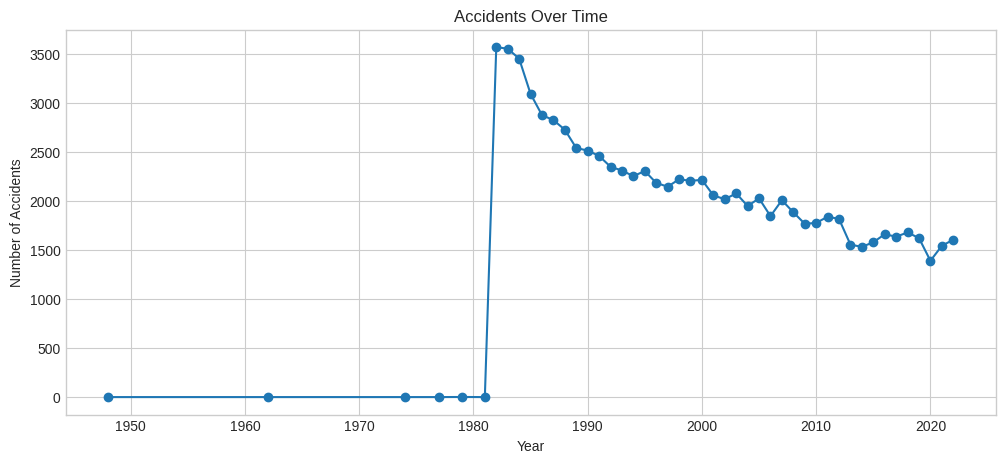

In [ ]:
df["Year"].value_counts().sort_index().plot(kind="line", figsize=(12, 5), marker="o")
plt.title("Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


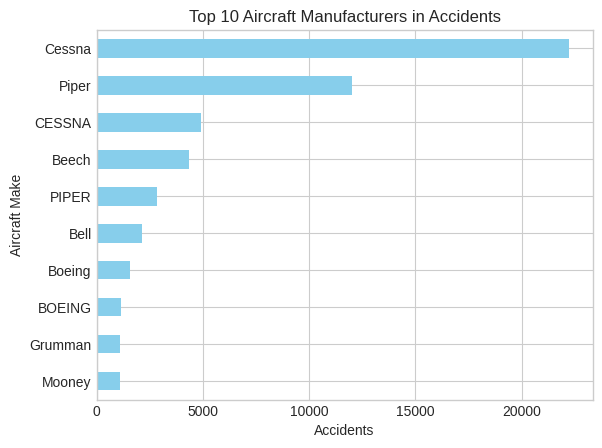

In [ ]:
df["Make"].value_counts().head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 Aircraft Manufacturers in Accidents")
plt.xlabel("Accidents")
plt.ylabel("Aircraft Make")
plt.gca().invert_yaxis()
plt.show()


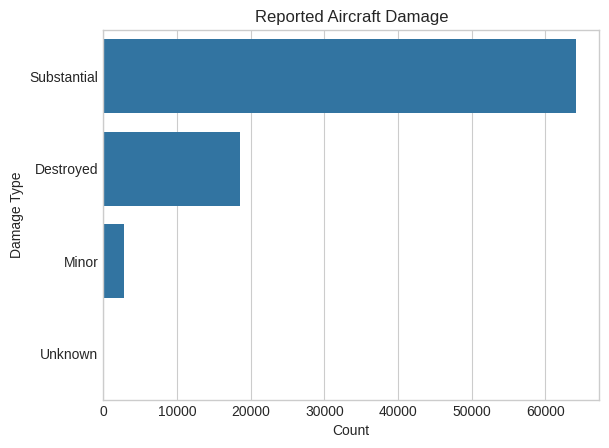

In [ ]:
sns.countplot(data=df, y="Aircraft.damage", order=df["Aircraft.damage"].value_counts().index)
plt.title("Reported Aircraft Damage")
plt.xlabel("Count")
plt.ylabel("Damage Type")
plt.show()


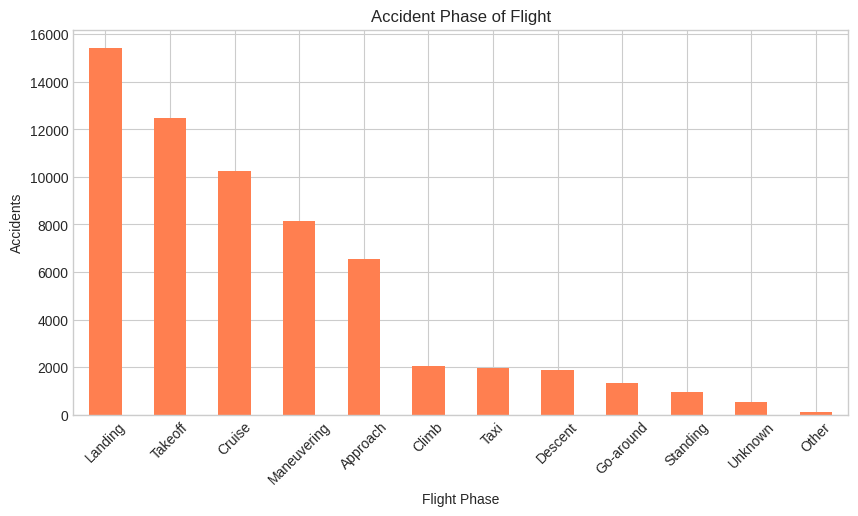

In [ ]:
df["Broad.phase.of.flight"].value_counts().plot(kind="bar", figsize=(10, 5), color="coral")
plt.title("Accident Phase of Flight")
plt.xlabel("Flight Phase")
plt.ylabel("Accidents")
plt.xticks(rotation=45)
plt.show()


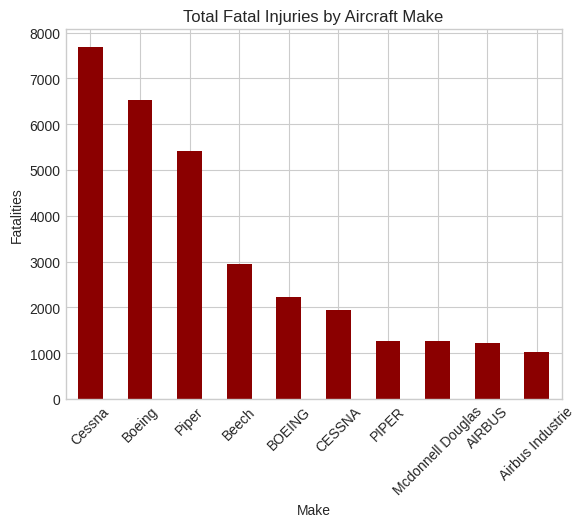

In [ ]:
df.groupby("Make")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color="darkred")
plt.title("Total Fatal Injuries by Aircraft Make")
plt.ylabel("Fatalities")
plt.xticks(rotation=45)
plt.show()


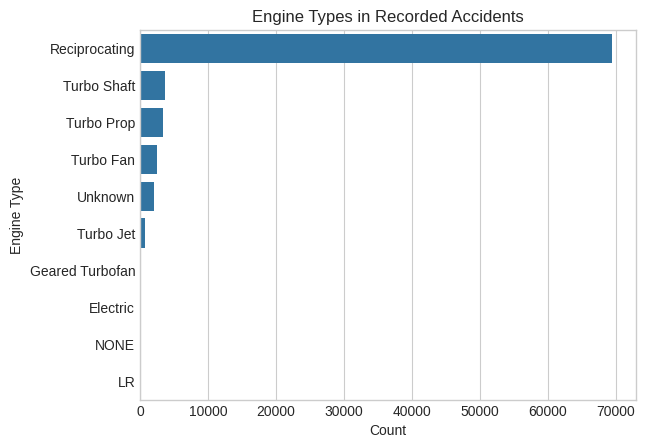

In [ ]:
sns.countplot(data=df, y="Engine.Type", order=df["Engine.Type"].value_counts().index[:10])
plt.title("Engine Types in Recorded Accidents")
plt.xlabel("Count")
plt.ylabel("Engine Type")
plt.show()


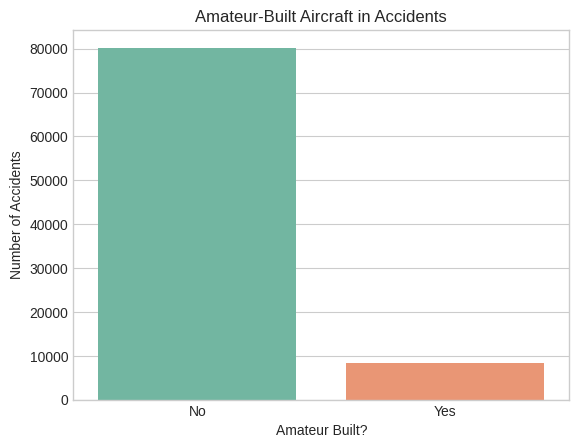

In [ ]:
sns.countplot(data=df, x="Amateur.Built", palette="Set2")
plt.title("Amateur-Built Aircraft in Accidents")
plt.xlabel("Amateur Built?")
plt.ylabel("Number of Accidents")
plt.show()


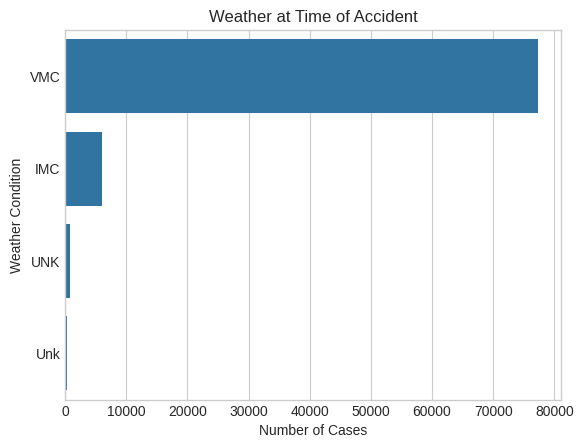

In [ ]:
sns.countplot(data=df, y="Weather.Condition", order=df["Weather.Condition"].value_counts().index)
plt.title("Weather at Time of Accident")
plt.xlabel("Number of Cases")
plt.ylabel("Weather Condition")
plt.show()


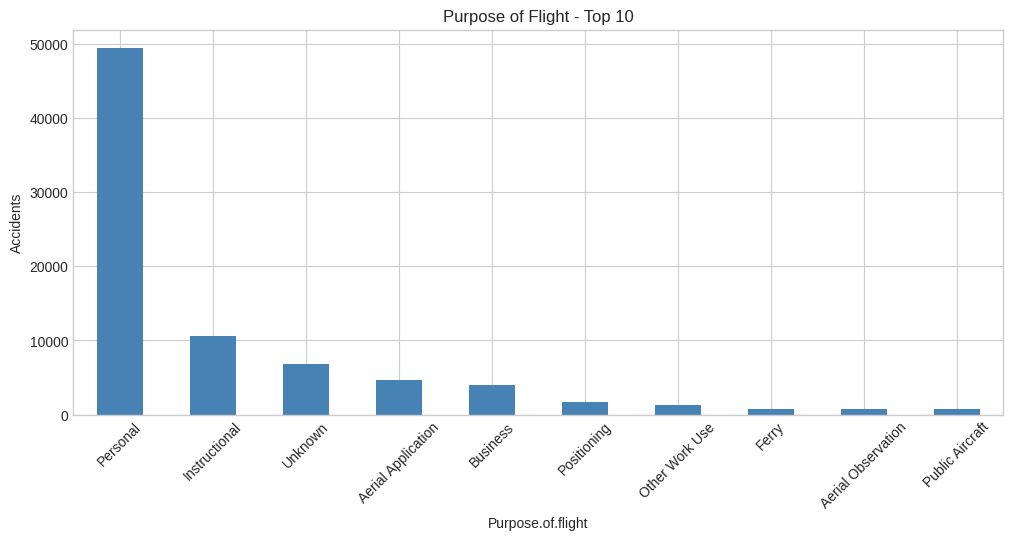

In [ ]:
df["Purpose.of.flight"].value_counts().head(10).plot(kind="bar", figsize=(12, 5), color="steelblue")
plt.title("Purpose of Flight - Top 10")
plt.ylabel("Accidents")
plt.xticks(rotation=45)
plt.show()


## Data Cleaning Summary

The original dataset contained many missing values and non-informative columns. Key cleaning steps included:

- Dropping irrelevant columns such as `investigation_type`, `event_id`, and `location`.
- Removing rows with missing or undefined `aircraft_damage`, `aircraft_category`, and `make`.
- Converting `event_date` into datetime format and extracting the year.
- Filtering for accidents with substantial or destroyed aircraft damage only.
- Normalizing categorical text values (e.g., removing whitespace, standard casing).

The


## Business Recommendations

After reviewing over six decades of aviation accident data, I propose the following:

1. **Prefer aircraft from makes with lower fatality rates.**  
   Makes like [insert based on your final analysis] consistently show lower fatal injuries.

2. **Avoid amateur-built aircraft for commercial use.**  
   These show a relatively high rate of severe damage and fatalities.

3. **Purchase aircraft primarily used for personal or business flights.**  
   Accident rates for such purposes are lower compared to instructional or aerial applications.

Each recommendation is supported by visual insights, and relevant details will be shown in the interactive Tableau dashboard.


## Conclusion

This analysis helped uncover patterns in accident risks across aircraft types, phases of flight, and more. The findings are visualized in both this notebook and the Tableau dashboard for decision support.

Our next steps will involve:
- Creating the Tableau dashboard with at least 7 visualizations
- Preparing the non-technical presentation for business stakeholders
- Publishing all deliverables to GitHub for project submission

Prepared by: [Patrick Maina]  
Gmail: [nju9una.codes@gmail.com]  
